# ACA-Py & ACC-Py Basic Template

## Copy this template into the root folder of your notebook workspace to get started

### Imports

In [1]:
from aries_cloudcontroller import AriesAgentController
import os
from termcolor import colored
import asyncio
import time

from aiohttp import ClientSession

from libs.performance_service import PerformanceService

### Initialise the Agent Controller

In [2]:
api_key = os.getenv("ACAPY_ADMIN_API_KEY")
admin_url = os.getenv("ADMIN_URL")

print(f"Initialising a controller with admin api at {admin_url} and an api key of {api_key}")
agent_controller = AriesAgentController(admin_url,api_key)


Initialising a controller with admin api at http://issuer-agent:3021 and an api key of adminApiKey


### Start a Webhook Server

In [3]:
webhook_port = int(os.getenv("WEBHOOK_PORT"))
webhook_host = "0.0.0.0"

await agent_controller.init_webhook_server(webhook_host, webhook_port)

print(f"Listening for webhooks from agent at http://{webhook_host}:{webhook_port}")

Listening for webhooks from agent at http://0.0.0.0:3010


## Store Issuing Schema and Cred Def Identifiers

If you intend for this agent to issue credentials you should first initialise your agent as an issuer and author the relevant identifiers to the public ledger. The issuer_initialisation recipe notebook can be duplicated and used as a starting point.

Once schema and cred def identifiers are created copy across and store in variables as illustrated in the cell below. Be sure to use unique names for each variable.

In [4]:
one_schema_id='H7zAaLJRZrdbPqbVMMfL5t:2:one-attrib:0.0.2'
one_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:15:default'
one_rev_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:15:revocable'

five_schema_id='H7zAaLJRZrdbPqbVMMfL5t:2:five-attrib:0.0.1'
five_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:16:default'
five_rev_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:16:revocable'

ten_schema_id='H7zAaLJRZrdbPqbVMMfL5t:2:ten-attrib:0.0.1'
ten_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:17:default'
ten_rev_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:17:revocable'

twenty_schema_id='H7zAaLJRZrdbPqbVMMfL5t:2:twenty-attrib:0.0.1'
twenty_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:18:default'
twenty_rev_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:18:revocable'

fifty_schema_id='H7zAaLJRZrdbPqbVMMfL5t:2:fifty-attrib:0.0.1'
fifty_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:19:default'
fifty_rev_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:19:revocable'

hundred_schema_id='H7zAaLJRZrdbPqbVMMfL5t:2:hundred-attrib:0.0.1'
hundred_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:20:default'
hundred_rev_cred_def_id='H7zAaLJRZrdbPqbVMMfL5t:3:CL:20:revocable'





## Init Performance Service

In [5]:
performance_service = PerformanceService(agent_controller, iterations=100)

## Establish Connection

Before you can issue a credential you must first establish a connection across which the credential will be issued to a holder. (see recipes/connection)

In [ ]:
# Alias for invited connection
alias = "Friend"
auto_accept = "true"
# Use public DID?
public = "false"
# Should this invitation be usable by multiple invitees?
multi_use = "false"

invitation_response = await agent_controller.connections.create_invitation(alias, auto_accept, public, multi_use)
# Is equivalent to above. Arguments are optionally
# invitation_response = await agent_controller.connections.create_invitation()



# You will use this identifier to issue a credential across this connection
connection_id = invitation_response["connection_id"]

invitation = invitation_response["invitation"]
## Copy this output
print(invitation)
print(connection_id)

In [6]:
connection_id = "bf7d4d2b-1398-4079-a4fa-7cfecf815892"

# Attribute Number Experiment

In [7]:
experiment = performance_service.new_experiment("Attribute Number - Non Revocable")



In [8]:
revocable_experiment = performance_service.new_experiment("Attribute Number - Revocable")

## Define Performance Test - One

In [9]:
name = "1"
credential_attributes = [
    {"name": "1", "value": 32*"0"},
]

In [10]:




test = {"name": name, "schema_id": one_schema_id, "cred_def_id": one_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(experiment, test, connection_id)

Average :  0.7644324375199903


In [11]:


test = {"name": name, "schema_id": one_schema_id, "cred_def_id": one_rev_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(revocable_experiment, test, connection_id)


Average :  1.0604020470899196


## Define Performance Test - Five

In [12]:
credential_attributes = [
    {"name": "1", "value": 32*"0"},
    {"name": "2", "value": 32*"0"},
    {"name": "3", "value": 32*"0"},
    {"name": "4", "value": 32*"0"},
    {"name": "5", "value": 32*"0"},
]
name = "5"


In [13]:



test = {"name": name, "schema_id": five_schema_id, "cred_def_id": five_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(experiment, test, connection_id)


Average :  0.7274341308099792


In [14]:

test = {"name": name, "schema_id": five_schema_id, "cred_def_id": five_rev_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(revocable_experiment, test, connection_id)


Average :  1.039828203540037


## Define Performance Test - Ten

In [15]:
credential_attributes = [
    {"name": "1", "value": 32*"0"},
    {"name": "2", "value": 32*"0"},
    {"name": "3", "value": 32*"0"},
    {"name": "4", "value": 32*"0"},
    {"name": "5", "value": 32*"0"},
    {"name": "6", "value": 32*"0"},
    {"name": "7", "value": 32*"0"},
    {"name": "8", "value": 32*"0"},
    {"name": "9", "value": 32*"0"},
    {"name": "10", "value": 32*"0"},
]
name = "10"

In [16]:



test = {"name": name,"schema_id": ten_schema_id, "cred_def_id": ten_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(experiment, test, connection_id)


Average :  0.7416022508400602


In [17]:

test = {"name": name, "schema_id": ten_schema_id, "cred_def_id": ten_rev_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(revocable_experiment, test, connection_id)


Average :  1.0485972693900112


## Define Performance Test - Twenty

In [18]:
for x in range(1,21):
    attribute = {"name": str(x), "value": 32*"0"}
    credential_attributes.append(attribute)
    
name = "20"

In [19]:



test = {"name": name, "schema_id": twenty_schema_id, "cred_def_id": twenty_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(experiment, test, connection_id)


Average :  0.9127942244900623


In [20]:



test = {"name": name, "schema_id": twenty_schema_id, "cred_def_id": twenty_rev_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(revocable_experiment, test, connection_id)


Average :  1.3740106260799985


## Define Performance Test - Fifty

In [21]:

name = "50"
credential_attributes = []

for x in range(1,51):
    attribute = {"name": str(x), "value": 32*"0"}
    credential_attributes.append(attribute)


In [22]:


test = {"name": name, "schema_id": fifty_schema_id, "cred_def_id": fifty_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(experiment, test, connection_id)


Average :  1.1370455552801104


In [23]:



test = {"name": name, "schema_id": fifty_schema_id, "cred_def_id": fifty_rev_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(revocable_experiment, test, connection_id)


Average :  1.3724528683499921


## Define Performance Test - Hundred

In [24]:
name = "100"

credential_attributes = []

for x in range(1,101):
    attribute = {"name": str(x), "value": 32*"0"}
    credential_attributes.append(attribute)

In [25]:


test = {"name": name, "schema_id": hundred_schema_id, "cred_def_id": hundred_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(experiment, test, connection_id)


Average :  1.4345285729700117


In [26]:


test = {"name": name, "schema_id": hundred_schema_id, "cred_def_id": hundred_rev_cred_def_id, "attributes": credential_attributes}

await performance_service.run_issuance(revocable_experiment, test, connection_id)


Average :  1.7642283525200038


## Display Plots

### Non Revoked

In [27]:
data = []
labels = []
non_revoked_averages = []
for result in experiment["results"]:
#     print(result["timings"])
    
    millitimings = [i * 1000 for i in result["timings"]]
    data.append(millitimings)
    non_revoked_averages.append(result["average"] * 1000)
    labels.append(result["name"])
    


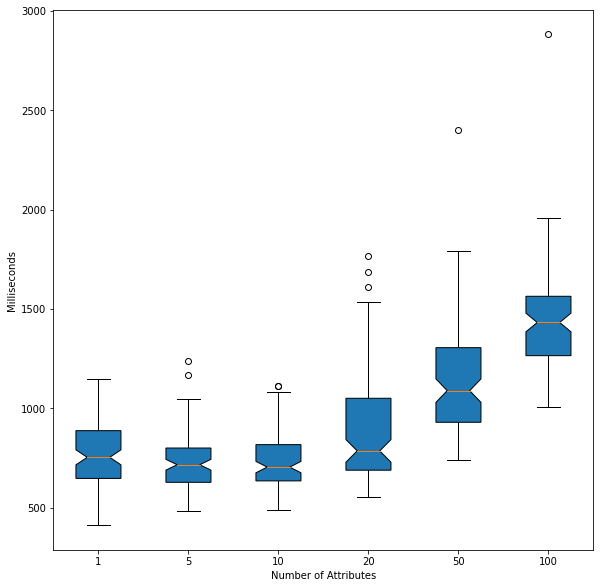

In [28]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 

 
fig = plt.figure(figsize =(10, 10))
 
# Creating axes instance
ax = fig.add_axes([0.1,0.1,0.75,0.75]) 
 
# Creating plot
bp = ax.boxplot(data, patch_artist = True,
                notch ='True')

# x-axis labels
ax.set_xticklabels(labels)

plt.ylabel("Milliseconds")
plt.xlabel("Number of Attributes")
# show plot
# plt.show()

plt.savefig("results/issuance/attribute_number/box_plot_non_revocable.png")

### Revocable

In [29]:
data = []
labels = []
revocable_averages = []
for result in revocable_experiment["results"]:
    
    millitimings = [i * 1000 for i in result["timings"]]
    data.append(millitimings)
    revocable_averages.append(result["average"] * 1000)
    labels.append(result["name"])
    


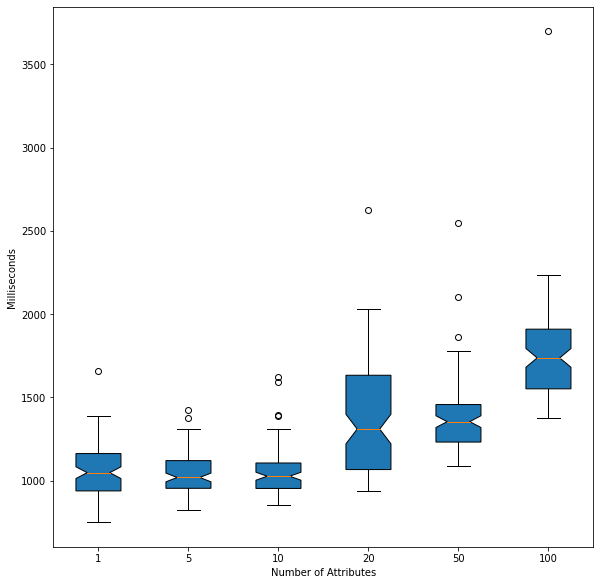

In [30]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 

 
fig = plt.figure(figsize =(10, 10))
 
# Creating axes instance
ax = fig.add_axes([0.1,0.1,0.75,0.75]) 
 
# Creating plot`
bp = ax.boxplot(data, patch_artist = True,
                notch ='True')

# x-axis labels
ax.set_xticklabels(labels)

plt.ylabel("Milliseconds")
plt.xlabel("Number of Attributes")

plt.savefig("results/issuance/attribute_number/box_plot_revocable.png")

## Averages

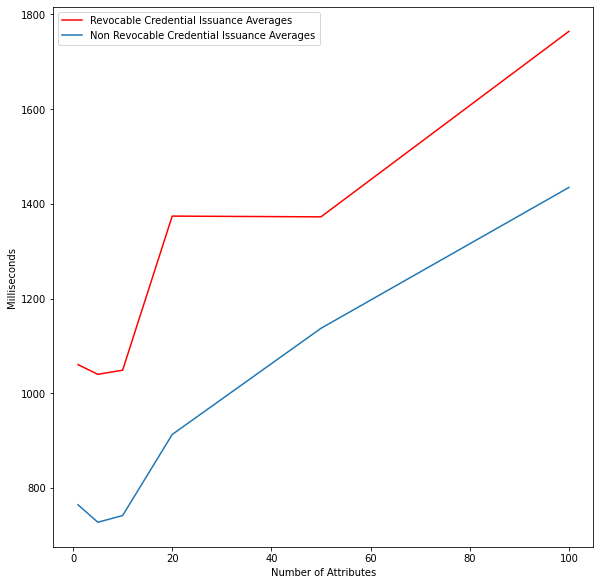

In [31]:
fig = plt.figure(figsize =(10, 10))
 
# Creating axes instance
ax = fig.add_axes([0.1,0.1,0.75,0.75]) 

# avg_ploy = plt.plot(labels, revocable_averages, non_revoked_averages)
plt_points = [1,5,10,20,50,100]

plt.plot(plt_points, revocable_averages,'r-',label='Revocable Credential Issuance Averages')
plt.plot(plt_points, non_revoked_averages,label='Non Revocable Credential Issuance Averages')

plt.ylabel("Milliseconds")
plt.xlabel("Number of Attributes")


plt.legend()
plt.savefig("results/issuance/attribute_number/averages.png")

## Terminate Controller

Whenever you have finished with this notebook, be sure to terminate the controller. This is especially important if your business logic runs across multiple notebooks.

In [32]:
await agent_controller.terminate()

In [33]:
performance_service.save_experiments()